#### K-Means Algorithm - lris

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
iris =load_iris()
iris_std =StandardScaler().fit_transform(iris.data)

pca =PCA(2)
iris_pca=pca.fit_transform(iris_std)

#### 1. 군집화(Clustering)

In [5]:
from sklearn.cluster import KMeans
KMeans().get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 8,
 'n_init': 'warn',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [8]:
kmeans =KMeans(n_clusters=3,verbose=1,random_state=2023,n_init='auto')
kmeans.fit(iris_std)   #y값을 주지 않음 비지도학습이여서

Initialization complete
Iteration 0, inertia 275.4536786153434.
Iteration 1, inertia 140.34880648377612.
Iteration 2, inertia 139.9942559949211.
Iteration 3, inertia 139.86727930745184.
Iteration 4, inertia 139.82543466174204.
Converged at iteration 4: strict convergence.


KMeans(n_clusters=3, n_init='auto', random_state=2023, verbose=1)

In [9]:
# 학습 결과 labels_ =데이터셋을 비슷한 특성을 가진 그룹으로 나누는 작업입니다.
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [11]:
# 52그룹 50그룹 48그룹으로 나눠어짐 제일 숫자가 많은 그룹은 0번 1번 2번형식으로
# 학습 결과 넘버링은 집단이 큰 순서부터 부여
np.unique(kmeans.labels_,return_counts=True)

(array([0, 1, 2]), array([52, 50, 48], dtype=int64))

#### 2. 시각화

In [12]:
df =pd.DataFrame(iris_pca,columns=['PC1','PC2'])
df['target'] =iris.target
df['cluster']=kmeans.labels_
df.head(54).tail()

,PC1,PC2,target,cluster
49,-2.203833,0.009216,0,1
50,1.101781,0.862972,1,2
51,0.731337,0.594615,1,2
52,1.240979,0.616298,1,2
53,0.407483,-1.754404,1,0


In [14]:
#데이터 분포
df.groupby(['target','cluster'])[['PC1']].count()

PC1
target cluster     
0      1         50
1      0         38
       2         12
2      0         14
       2         36

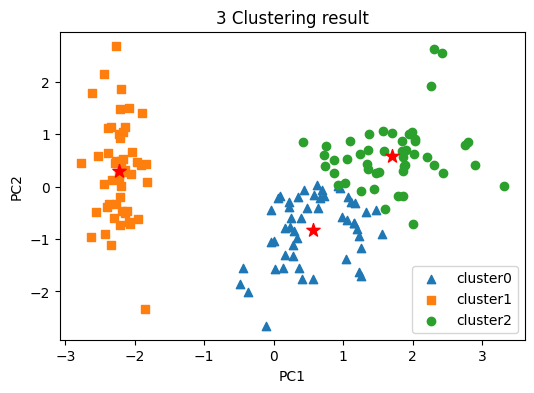

In [19]:
markers = ['^', 's', 'o']   # setisa, versicolor, verginica

plt.figure(figsize=(6,4))
for i , marker in enumerate(markers):
    x_data = df[df.cluster == i]['PC1']
    y_data = df[df.cluster == i]['PC2']
    plt.scatter(x_data, y_data, marker=marker, label='cluster'+str(i))
    plt.scatter(x_data.mean(),y_data.mean(),marker='*',c='red',s=100)

plt.legend()
plt.xlabel('PC1'), plt.ylabel('PC2')
plt.title("3 Clustering result")
plt.show()

- PCA Original Data와 비교

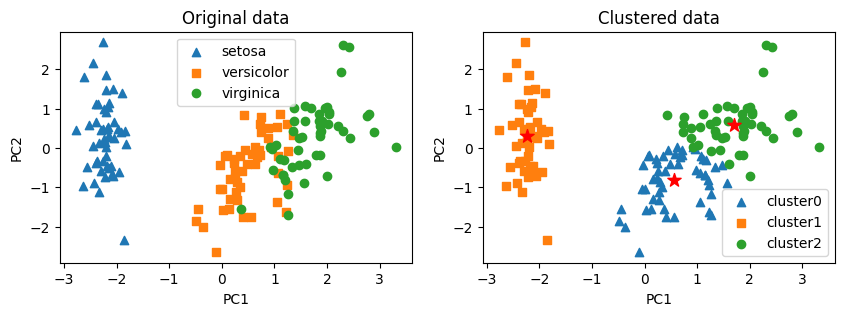

In [21]:
plt.figure(figsize=(10,3))
for k,column in enumerate (['target','cluster']):
    plt.subplot(1,2,k+1)
    for i , marker in enumerate(markers):
        x_data = df[df[column] == i]['PC1']
        y_data = df[df[column] == i]['PC2']
        if k == 0:
            plt.scatter(x_data, y_data, marker=marker, label=iris.target_names[i])
        else:
            plt.scatter(x_data, y_data, marker=marker, label='cluster'+str(i))
            plt.scatter(x_data.mean(),y_data.mean(),marker='*',c='red',s=100)

    plt.legend()
    plt.xlabel('PC1'), plt.ylabel('PC2')
    if k == 0:
        plt.title("Original data")
    else:
        plt.title("Clustered data")

plt.show()